In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import expit

def sigmoid_interpolation(y_values, x_original, x_interpolated):
    y_interpolated = np.zeros_like(x_interpolated)
    for i in range(1, len(y_values)):
        # Segment interpolation between each pair of points
        x_start, x_end = x_original[i-1], x_original[i]
        y_start, y_end = y_values[i-1], y_values[i]
        
        # Normalize to [0, 1] for the sigmoid function
        x_segment = x_interpolated[(x_interpolated >= x_start) & (x_interpolated <= x_end)]
        x_normalized = (x_segment - x_start) / (x_end - x_start)
        
        # Apply sigmoid for ease-in and ease-out
        sigmoid_segment = expit(12 * (x_normalized - 0.5))  # Steepness factor 12 for sharp transition
        y_segment = y_start + (y_end - y_start) * sigmoid_segment
        
        # Store the interpolated segment
        y_interpolated[(x_interpolated >= x_start) & (x_interpolated <= x_end)] = y_segment
    
    return y_interpolated

In [184]:
data = {'wind': [0.5, 1.0, 0.2, 0.8, 0.4], 'swell': [0.3, 1.0, 0.2, 0.4, 0.01]} #[0.3, 0.8, 0.5, 0.2, 0.01]
df_original = pd.DataFrame(data)

In [185]:
x_original = np.linspace(0, len(df_original)-1, len(df_original))
x_interpolated = np.linspace(0, len(df_original)-1, 7200)

In [186]:
wind_interpolated = sigmoid_interpolation(df_original['wind'], x_original, x_interpolated)
swell_interpolated = sigmoid_interpolation(df_original['swell'], x_original, x_interpolated)
df_interpolated = pd.DataFrame({'wind': wind_interpolated, 'swell': swell_interpolated})

df_interpolated.head()

,wind,swell
0,0.501236,0.301731
1,0.501245,0.301742
2,0.501253,0.301754
3,0.501261,0.301766
4,0.501270,0.301778


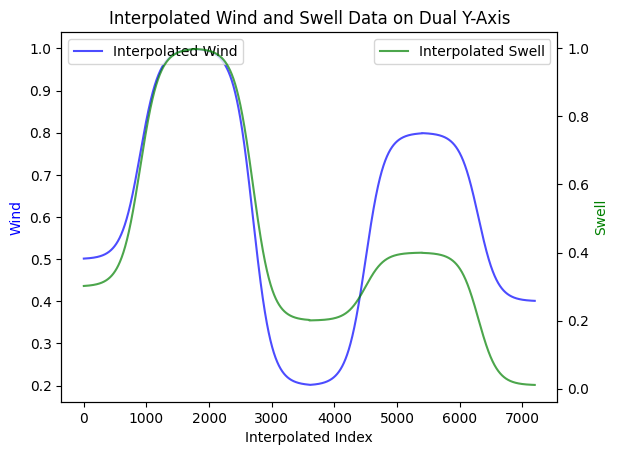

In [187]:
# Plotting the interpolated wind and swell data with a dual y-axis

fig, ax1 = plt.subplots()

# Plot interpolated wind data
ax1.plot(df_interpolated.index, df_interpolated["wind"], label='Interpolated Wind', color='blue', alpha=0.7)
ax1.set_xlabel('Interpolated Index')
ax1.set_ylabel('Wind', color='blue')

# Secondary y-axis for interpolated swell data
ax2 = ax1.twinx()
ax2.plot(df_interpolated.index, df_interpolated["swell"], label='Interpolated Swell', color='green', alpha=0.7)
ax2.set_ylabel('Swell', color='green')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Interpolated Wind and Swell Data on Dual Y-Axis')
plt.show()

In [188]:
time = np.linspace(0, 1, 7200)
frequency = df_interpolated['wind'] * 31.4  # Frequency based on swell data
amplitude = df_interpolated['swell']  # Amplitude based on wind data
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

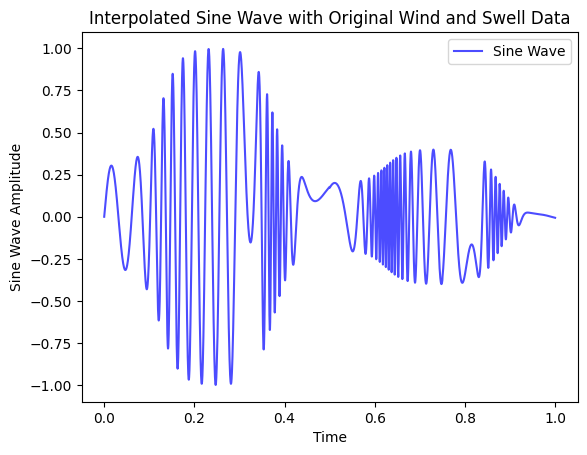

In [189]:
fig, ax1 = plt.subplots()

# Plot sine wave
ax1.plot(time, sine_wave, label='Sine Wave', color='blue', alpha=0.7)
ax1.set_xlabel('Time')
ax1.set_ylabel('Sine Wave Amplitude')

# Adding legends
ax1.legend(loc='upper right')

plt.title('Interpolated Sine Wave with Original Wind and Swell Data')
plt.show()


In [192]:
sine_wave.to_csv("../sine.csv",index= True)